# Exercise Chapter 9 
Industrial Statistics: A Computer Based Approach with Python<br>
by Ron Kenett, Shelemyahu Zacks, Peter Gedeck

Publisher: Springer International Publishing; 1st edition (2023) <br>
<!-- ISBN-13: 978-3031075650 -->

(c) 2022 Ron Kenett, Shelemyahu Zacks, Peter Gedeck

The code needs to be executed in sequence.

In [1]:
import os
os.environ['OUTDATED_IGNORE'] = '1'
import warnings
from outdated import OutdatedPackageWarning
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=OutdatedPackageWarning)

In [2]:
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.formula.api as smf
import lifelines
import pingouin as pg
import seaborn as sns
import matplotlib.pyplot as plt
import mistat

# Exercise 6

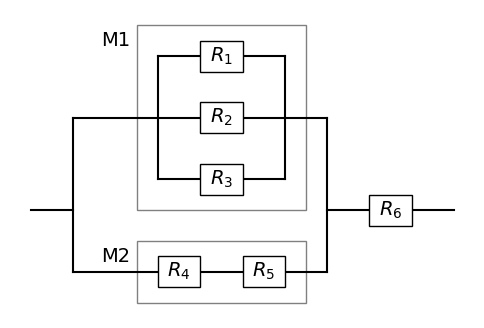

In [3]:
def labeledBox(ax, corner, sides, label):
    corner = list(corner)
    corner[1] = corner[1] - sides[1]/2
    ax.add_patch(patch.Rectangle(corner, *sides, facecolor='white', edgecolor="black", zorder=10))
    ax.annotate(label, (corner[0] + sides[0] / 2, corner[1] + sides[1] / 2), color='black',
                    fontsize=14, ha='center', va='center', zorder=11)

import matplotlib.patches as patch
fig, ax = plt.subplots(figsize=[6, 4])

x1 = 1; yM1 = 3; yM2 = 2
x3 = x1 + 6
ax.plot((0, x1), (0, 0), color='black')
ax.plot((x1, x1), (-yM2, yM1), color='black')
ax.plot((x3, x3), (-yM2, yM1), color='black')
ax.plot((x3, x3 + 3), (0, 0), color='black')
# M1
x2 = 3; y1 = yM1
ax.plot((x1, x3), (y1, y1), color='black')
ax.plot((x2, x2), (y1+2, y1-2), color='black')
ax.plot((x2, x2+3), (y1+2, y1+2), color='black')
ax.plot((x2, x2+3), (y1-2, y1-2), color='black')
ax.plot((x2+3, x2+3), (y1+2, y1-2), color='black')
xb = 4
labeledBox(ax, (xb, y1+2), (1, 1), r'$R_1$')
labeledBox(ax, (xb, y1), (1, 1), r'$R_2$')
labeledBox(ax, (xb, y1-2), (1, 1), r'$R_3$')
# M2
ax.plot((x1, x3), (-yM2, -yM2), color='black')
labeledBox(ax, (x1+2, -yM2), (1, 1), r'$R_4$')
labeledBox(ax, (x1+4, -yM2), (1, 1), r'$R_5$')

labeledBox(ax, (x1+7, 0), (1, 1), r'$R_6$')

corner = [2.5, -3]; sides=[4, 2]
ax.add_patch(patch.Rectangle(corner, *sides, facecolor='none', edgecolor="grey", zorder=-1))
corner = [2.5, 0]; sides=[4, 6]
ax.add_patch(patch.Rectangle(corner, *sides, facecolor='none', edgecolor="grey", zorder=-1))
ax.annotate('M1', (2,5.5), color='black',
          fontsize=14, ha='center', va='center', zorder=11)
ax.annotate('M2', (2,-1.5), color='black',
          fontsize=14, ha='center', va='center', zorder=11)

ax.set_ylim(-3.5, 6.5)
plt.axis('off')
plt.show()

# Exercise 19

Intercept    2.294805
Wi           0.496692
dtype: float64


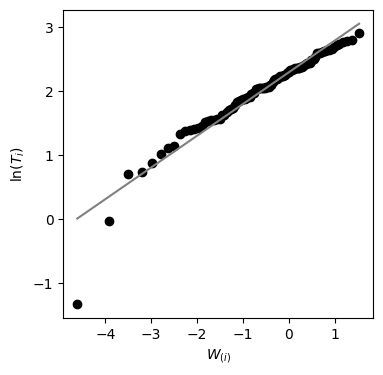

In [4]:
np.random.seed(1)
n = 100
lnTi = np.log(sorted(stats.weibull_min(2.5, scale=10).rvs(n)))
Wi = [np.log(-np.log(1 - i / (n+1))) for i in range(1, n + 1)]
df = pd.DataFrame({'Wi': Wi, 'lnTi': lnTi})
model = smf.ols('lnTi ~ Wi + 1', data=df).fit()
print(model.params)
intercept, slope = model.params
fig, ax = plt.subplots(figsize=(4, 4))
ax.plot((Wi[0], Wi[-1]),
        (slope * Wi[0] + intercept, slope * Wi[-1] + intercept),
        color='grey')
ax.scatter(Wi, lnTi, color='black')
ax.set_xlabel(r'$W_{(i)}$')
ax.set_ylabel(r'$\ln(T_i)$')
plt.show()

In [5]:
beta = np.exp(intercept)
nu = 1 / slope
print(f'beta {beta:.3f}, nu {nu:.3f}')

beta 9.922, nu 2.013


# Exercise 20

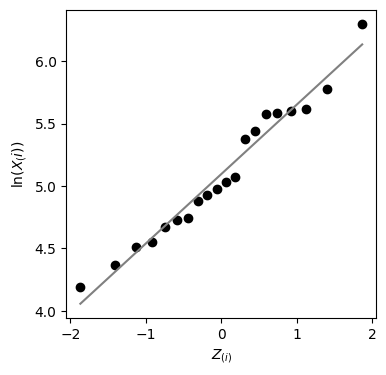

In [6]:
Xi = [94.9, 106.9, 229.7, 275.7, 144.5, 112.8, 159.3, 153.1,
        270.6, 322.0, 216.4, 544.6, 266.2, 263.6, 138.5, 79.0,
        114.6, 66.1, 131.2, 91.1]
n = len(Xi)
Zi = [stats.norm().ppf((i - 3/8)/(n + 1/4)) for i in range(1, n+1)]

df = pd.DataFrame({'Zi': Zi, 'lnXi': np.log(sorted(Xi))})
model = smf.ols('lnXi ~ Zi + 1', data=df).fit()

intercept, slope = model.params
fig, ax = plt.subplots(figsize=(4, 4))
ax.plot((Zi[0], Zi[-1]),
        (slope * Zi[0] + intercept, slope * Zi[-1] + intercept),
        color='grey')
ax.scatter(Zi, df['lnXi'], color='black')
ax.set_xlabel(r'$Z_{(i)}$')
ax.set_ylabel(r'$\ln(X_(i))$')
plt.show()

In [7]:
print(model.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.967    
Dependent Variable: lnXi             AIC:                -34.2078 
Date:               2022-09-10 19:53 BIC:                -32.2164 
No. Observations:   20               Log-Likelihood:     19.104   
Df Model:           1                F-statistic:        565.8    
Df Residuals:       18               Prob (F-statistic): 4.74e-15 
R-squared:          0.969            Scale:              0.0096297
--------------------------------------------------------------------
             Coef.    Std.Err.      t       P>|t|    [0.025   0.975]
--------------------------------------------------------------------
Intercept    5.0957     0.0219   232.2280   0.0000   5.0496   5.1418
Zi           0.5559     0.0234    23.7868   0.0000   0.5068   0.6050
------------------------------------------------------------------
Omnibus:               3.915        Durbin-Watson:           1.014
Pro

In [8]:
mu = intercept
sigma = slope
print(f'mu {mu:.3f}, sigma {sigma:.3f}')

mu 5.096, sigma 0.556


# Exercise 21

Intercept    5.959374
Wi           1.168853
dtype: float64


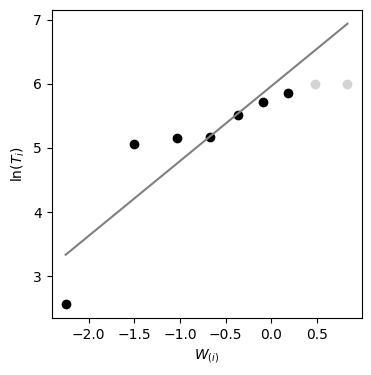

In [9]:
np.random.seed(1)
data = [13, 157, 172, 176, 249, 303, 350, 400, 400]
n = len(data)
lnTi = np.log(data)
Wi = [np.log(-np.log(1 - i / (n+1))) for i in range(1, n + 1)]
# exclude the censored data for the regression analysis
df = pd.DataFrame({'Wi': Wi[:7], 'lnTi': lnTi[:7]})
model = smf.ols('lnTi ~ Wi + 1', data=df).fit()
print(model.params)
intercept, slope = model.params
fig, ax = plt.subplots(figsize=(4, 4))
ax.plot((Wi[0], Wi[-1]),
        (slope * Wi[0] + intercept, slope * Wi[-1] + intercept),
        color='grey')
ax.scatter(Wi[:-2], lnTi[:-2], color='black')
ax.scatter(Wi[-2:], lnTi[-2:], color='lightgrey')
ax.set_xlabel(r'$W_{(i)}$')
ax.set_ylabel(r'$\ln(T_i)$')
plt.show()

# Exercise 22

<AxesSubplot:xlabel='timeline'>

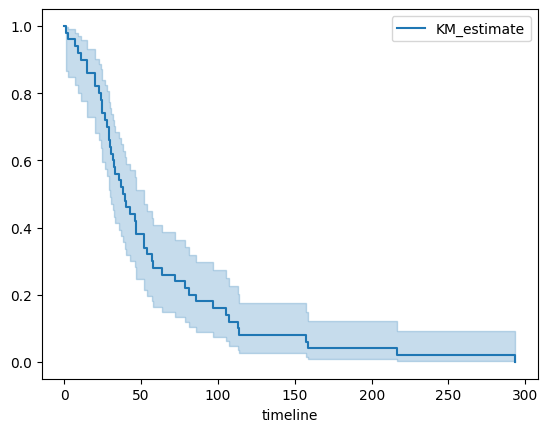

In [10]:
elecfail = mistat.load_data('ELECFAIL.csv')

kmf = lifelines.KaplanMeierFitter()
kmf.fit(elecfail)
kmf.plot_survival_function()

# Exercise 23

In [11]:
elecfail = mistat.load_data('ELECFAIL.csv')

kmf = lifelines.ExponentialFitter()
kmf.fit(elecfail)
kmf.print_summary()

<lifelines.ExponentialFitter:"Exponential_estimate", fitted with 50 total observations, 0 right-censored observations>
   number of observations = 50
number of events observed = 50
           log-likelihood = -252.21
               hypothesis = lambda_ != 1

---
          coef   se(coef)   coef lower 95%   coef upper 95%    z      p   -log2(p)
lambda_  57.07       8.07            41.25            72.89 6.95 <0.005      37.97
---
AIC = 506.43

# Exercise 24

In [12]:
T = [96.88, 154.24, 67.44, 191.72, 173.36, 200, 140.81, 200,
     154.71, 120.73, 24.29, 10.95, 2.36, 186.93, 57.61, 99.13,
     32.74, 200, 39.77, 39.52]
E = [ti < 200 for ti in T]

kmf = lifelines.ExponentialFitter()
kmf.fit(T, E)
kmf.print_summary()

<lifelines.ExponentialFitter:"Exponential_estimate", fitted with 20 total observations, 3 right-censored observations>
   number of observations = 20
number of events observed = 17
           log-likelihood = -99.62
               hypothesis = lambda_ != 1

---
          coef   se(coef)   coef lower 95%   coef upper 95%    z      p   -log2(p)
lambda_ 129.01      31.29            67.68           190.34 4.09 <0.005      14.51
---
AIC = 201.24

# Exercise 26

In [13]:
T = mistat.load_data('WEIBUL.csv')

kmf = lifelines.WeibullFitter()
kmf.fit(T)
kmf.print_summary()

<lifelines.WeibullFitter:"Weibull_estimate", fitted with 50 total observations, 0 right-censored observations>
   number of observations = 50
number of events observed = 50
           log-likelihood = -206.50
               hypothesis = lambda_ != 1, rho_ != 1

---
          coef   se(coef)   coef lower 95%   coef upper 95%    z      p   -log2(p)
lambda_  27.08       2.94            21.31            32.85 8.86 <0.005      60.17
rho_      1.37       0.15             1.09             1.66 2.57   0.01       6.63
---
AIC = 417.00

In [14]:
n_boot=5
idx = list(range(len(T)))
def stat_func(x):
    epf = lifelines.WeibullFitter().fit(T[x])
    return epf.params_['lambda_']

ci, dist = pg.compute_bootci(idx, func=stat_func, n_boot=n_boot, confidence=0.95,
                             method='per', seed=1, return_dist=True)
print(f'std(beta): {np.std(dist)}')

def stat_func(x):
    epf = lifelines.WeibullFitter().fit(T[x])
    return epf.params_['rho_']
ci, dist = pg.compute_bootci(idx, func=stat_func, n_boot=n_boot, confidence=0.95,
                             method='per', seed=1, return_dist=True)
print(f'nu(std): {np.std(dist)}')

std(beta): 2.8735759059232406


nu(std): 0.07224217322172025


# Exercise 31

In [15]:
factor = 0.01*np.exp(-300/500) + 0.99*np.exp(-300/1000)
integral = 0.01*500*np.exp(-300/500) + 0.99*1000*np.exp(-300/1000)
with_burn_in = 300 + integral/factor
no_burn_in = 0.01 * 500 + 0.99 * 1000
with_burn_in - no_burn_in

301.2862836203999